The Winter Olympics are built for snow, ice and mountains. Unsurprisingly, countries like Norway, Canada and Switzerland dominate the competition year after year.

However, Australia seems to be an exception to this story.

<img src="img/ausolympics.png" width="60%">
Source: <a href="https://www.theguardian.com/sport/2026/feb/17/how-did-australia-get-so-good-winter-olympics-gold-medals-tally-count">The Guardian</a>

In recent years, Australia's performance at the winter olympics has been consistently improving, with them putting up the best performance yet this year, obtaining a total of 6 medals (at the time of writing this blog), beating the previous record by 2 medals set in 2022. While this is by no means as impressive as the 37 medals currently won by the first place, Norway, Australia is placed 14th on the leaderboard. Notably, all 13 countries which have performed better than Australia are in the Northern Hemisphere.

According to The Guardian article, it is said that their success has come "through clever strategy and targeted resource allocation." Out of the 16 different disciplines in the winter olympics, all of Australia's medals came from two: freestyle skiing (moguls), and snowboarding. 

This lead me to ask:

Do traditionally "wintry" countries succeed because they diversify across many disciplines, while warmer nations survive through strategic specialisation? And is diversification a luxury available only to large, cold countries?

Using historical Winter Olympics data, this analysis explores whether geography shapes not just who wins, but how they win.

### Setup

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

wolympics_df = pd.read_csv('data/winter_olympics_medals.csv')

wolympics_df = wolympics_df[~wolympics_df['year'].isin([2012,2016,2020])]
wolympics_df = wolympics_df[wolympics_df["type"] == "Winter"]

bios_df = pd.read_csv('data/bios.csv')
pop_df = pd.read_csv('data/populations.csv')
medals_df = wolympics_df[wolympics_df["medal"].notna()].copy()

world = gpd.read_file("data/worldmap.json")
region_lookup = world[["iso_a3", "continent", "region_un", "subregion"]].copy()


### Who dominates the Winter Olympics?

In [2]:
country_totals = (
    medals_df.groupby("noc")
    .size()
    .reset_index(name="medals_total")
    .sort_values("medals_total", ascending=False)
)

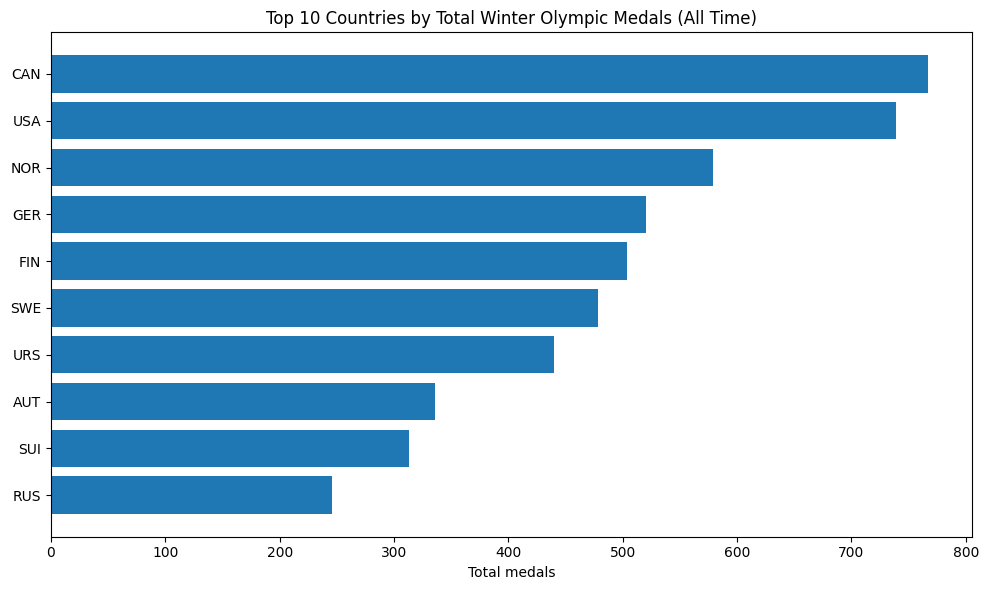

In [3]:
topN = 10
top_countries = country_totals.head(topN).copy()

plt.figure(figsize=(10, 6))

plt.barh(
    top_countries["noc"][::-1],
    top_countries["medals_total"][::-1]
)

plt.title(f"Top {topN} Countries by Total Winter Olympic Medals (All Time)")
plt.xlabel("Total medals")
plt.ylabel("")

plt.tight_layout()
plt.show()


Looking at the above bar graph, we can see that Canada and the United States dominate, having taken home 767 and 769 medals overall respectively. 

Additionally, we can see that the top 10 countries (Canada, USA, Norway, Germany, Finland, Sweden, Soviet Union, Austria, Switzerland and Russia) are in the northern hemisphere, with colder climates and mountainous terrain. 

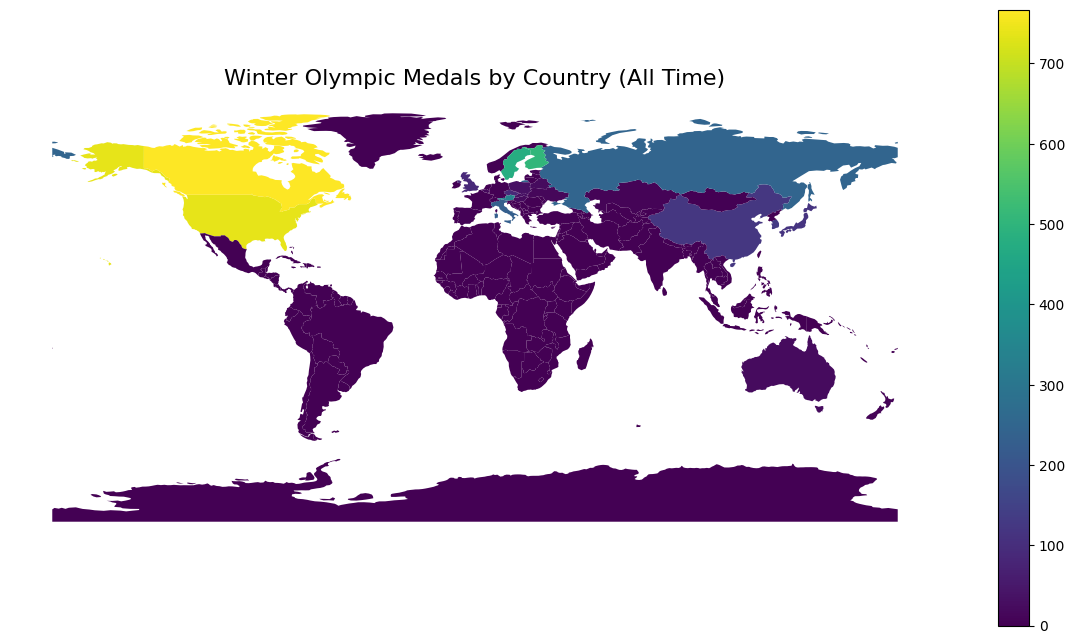

In [4]:
medals_with_region = country_totals.merge(
    region_lookup,
    left_on="noc",
    right_on="iso_a3",
    how="left"
)

world_medals = world.merge(
    country_totals,
    left_on="iso_a3",
    right_on="noc",
    how="left"
)

world_medals["medals_total"] = world_medals["medals_total"].fillna(0)

ax = world_medals.plot(column="medals_total", legend=True, figsize=(15,8))
ax.set_title("Winter Olympic Medals by Country (All Time)", fontsize=16)
ax.axis("off")

plt.show()

The world map reinforces this pattern visually. Medals are heavily concentrated in North America and Northern Europe, with the United States, Canada, Norway and Russia clearly standing out. Much of Africa, South America, Southeast Asia and Oceania show little to no historical medal presence.

Rather than being evenly distributed across the globe, Winter Olympic success is geographically clustered, with the strongest performers are located in high-latitude regions, where cold climates and mountainous terrain make winter sports both culturally embedded and relatively easier to access.

This geographic clustering suggests that environmental factors may shape not only participation but also the breadth of opportunity across disciplines. Countries with extensive winter infrastructure and long-standing sporting traditions may be better positioned to compete across multiple events, potentially enabling diversification which we will delve deeper into. In contrast to this, nations without natural winter conditions may need to specialise strategically in a smaller set of disciplines.

Whilst the global pattern suggests that geography plays a significant role in success, we will now explore Australia's steadily increasing success over the past few years, despite its climatic differences.

### Is Australia's rise in the Winter Olympics really attributed to specialisation?

The Guardian attributes Australia’s recent success to “clever strategy and targeted resource allocation.” This implies that Australia does not compete broadly across the Winter Olympic programs, but instead concentrates its efforts in a narrow set of events.

To test this, we will examine not just medal counts, but how those medals are distributed across events.

In [5]:
country_event = (
    medals_df.groupby(["noc", "event"])
    .size()
    .reset_index(name="medals")
)

div_metrics = (
    country_event.groupby("noc")
    .agg(
        medals_total=("medals", "sum"),
        n_events=("event", "nunique"),
        top_share=("medals", lambda x: x.max() / x.sum())
    )
    .reset_index()
)

div_metrics.sort_values("medals_total", ascending=False).head(10)

,noc,medals_total,n_events,top_share
5,CAN,767,63,0.342894
42,USA,739,63,0.219215
28,NOR,579,68,0.103627
18,GER,520,67,0.069231
13,FIN,504,43,0.315476
38,SWE,478,52,0.368201
41,URS,440,32,0.381818
1,AUT,336,46,0.083333
36,SUI,313,44,0.178914
34,RUS,246,53,0.174797


The above table shows the country, the total number of medals they obtained, the number of different events they participated in, and the proportion of medals which were won in each country's strongest event. 

From this, we can actually see that Canada and the United States attribute a significant portion of their success to a single event. Around 34% of Canada’s medals come from its strongest event, while the United States concentrates about 22% in one area. Sweden and the former Soviet Union show even higher concentration levels, with roughly 37% and 38% of their medals tied to a single event.

By contrast, countries such as Germany and Norway distribute their success far more evenly. Germany’s top event accounts for just 7% of its medals, and Norway’s for about 10%, despite both nations medalling across nearly 70 different events. Austria follows a similar pattern, with only 8% concentration in its strongest event. These countries are not defined by a dominant niche but by sustained competitiveness across the programme.

We can see that there is a lot of geographic clustering. Canada and the United States are part of North America, while the remaining dominant nations are almost entirely European. Many of these countries, such as Austria and Switzerland, are highly mountainous, while others like Norway, Finland and Sweden benefit from long, harsh winters and strong winter sport traditions.


In [6]:
aus_events = (
    country_event[country_event["noc"] == "AUS"]
    .sort_values("medals", ascending=False)
)

aus_events.head()

,noc,event,medals
1,AUS,"5,000 metres Relay, Men (Olympic)",4
3,AUS,"Aerials, Women (Olympic)",4
7,AUS,"Moguls, Men (Olympic)",3
5,AUS,"Halfpipe, Men (Olympic)",2
6,AUS,"Halfpipe, Women (Olympic)",2


In [7]:
top2_share_aus = aus_events["medals"].head(2).sum() / aus_events["medals"].sum()
top2_share_aus


np.float64(0.36363636363636365)

In [8]:
pop_long = pop_df.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="year",
    value_name="population"
)

pop_long["year"] = pop_long["year"].astype(int)
pop_long = pop_long.rename(columns={"Country Code": "noc"})

medals_with_pop = medals_df.merge(pop_long[["noc", "year", "population"]],
                                  on=["noc", "year"],
                                  how="left")

country_pop = (
    medals_with_pop.groupby("noc")["population"]
    .median()
    .reset_index(name="population_median")
)

div_metrics = div_metrics.merge(country_pop, on="noc", how="left")
div_metrics.head()

,noc,medals_total,n_events,top_share,population_median
0,AUS,22,12,0.181818,22031750.0
1,AUT,336,46,0.083333,8081957.0
2,BEL,16,7,0.312500,11556434.0
3,BLR,23,9,0.217391,9448515.0
4,BUL,6,5,0.333333,NaN


In [9]:
div_metrics = div_metrics.dropna(subset=["population_median"]).copy()

div_metrics["size_bucket"] = pd.qcut(
    div_metrics["population_median"],
    q=3,
    labels=["small", "medium", "large"]
)

summary_by_size = (
    div_metrics.groupby("size_bucket")[["medals_total", "n_events", "top_share"]]
    .median()
    .reset_index()
)

summary_by_size

,size_bucket,medals_total,n_events,top_share
0,small,27.5,8.5,0.324405
1,medium,19.0,7.0,0.388839
2,large,126.0,24.5,0.187398


In [10]:
div_metrics.columns


Index(['noc', 'medals_total', 'n_events', 'top_share', 'population_median',
       'size_bucket'],
      dtype='str')

In [12]:
country_meta = world[["iso_a3", "continent"]].copy()
country_meta = country_meta.rename(columns={"iso_a3": "noc"})

div_metrics = div_metrics.merge(country_meta, on="noc", how="left")

div_metrics.groupby("continent")[["n_events", "top_share", "medals_total"]].median().sort_values("medals_total", ascending=False)

KeyError: 'continent'

In [13]:
continent_totals = (
    div_metrics.groupby("continent")["medals_total"]
    .sum()
    .sort_values(ascending=False)
)

continent_totals


KeyError: 'continent'